In [212]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matyplotlib -rf

Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [213]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import random

plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)

BASE = Path.cwd().parents[1] / "python-server" / "app" / "data_pipeline"


SKU_PATH = BASE / "sku_catalog_ml_with_share.csv"
SALES_PATH = BASE / "weekly_sales.csv"
FEATURES_PATH = BASE / "features_all.csv"
PRED_PATH = BASE / "eval_2025_pred_vs_actual.csv"  

print(SKU_PATH, SALES_PATH, FEATURES_PATH, PRED_PATH)


C:\Users\chosw\ORDER101_AI_LAST_134\be18-fin-SYNERGY-ORDER101\python-server\app\data_pipeline\sku_catalog_ml_with_share.csv C:\Users\chosw\ORDER101_AI_LAST_134\be18-fin-SYNERGY-ORDER101\python-server\app\data_pipeline\weekly_sales.csv C:\Users\chosw\ORDER101_AI_LAST_134\be18-fin-SYNERGY-ORDER101\python-server\app\data_pipeline\features_all.csv C:\Users\chosw\ORDER101_AI_LAST_134\be18-fin-SYNERGY-ORDER101\python-server\app\data_pipeline\eval_2025_pred_vs_actual.csv


In [276]:
df_sku = pd.read_csv(SKU_PATH)
df_sales = pd.read_csv(SALES_PATH, parse_dates=["target_date"])
df_feat = pd.read_csv(FEATURES_PATH, parse_dates=["target_date"])
df_pred = pd.read_csv(PRED_PATH, parse_dates=["target_date"])

print("SKU rows:", len(df_sku))
print("Sales rows:", len(df_sales))
print("Features rows:", len(df_feat))
print("Pred rows:", len(df_pred))

df_sales.head()


SKU rows: 206
Sales rows: 53766
Features rows: 51294
Pred rows: 10712


,target_date,warehouse_id,store_id,sku_id,actual_order_qty
0,2021-01-04,1,1,1,0
1,2021-01-04,1,1,2,0
2,2021-01-04,1,1,3,0
3,2021-01-04,1,1,4,0
4,2021-01-04,1,1,5,0


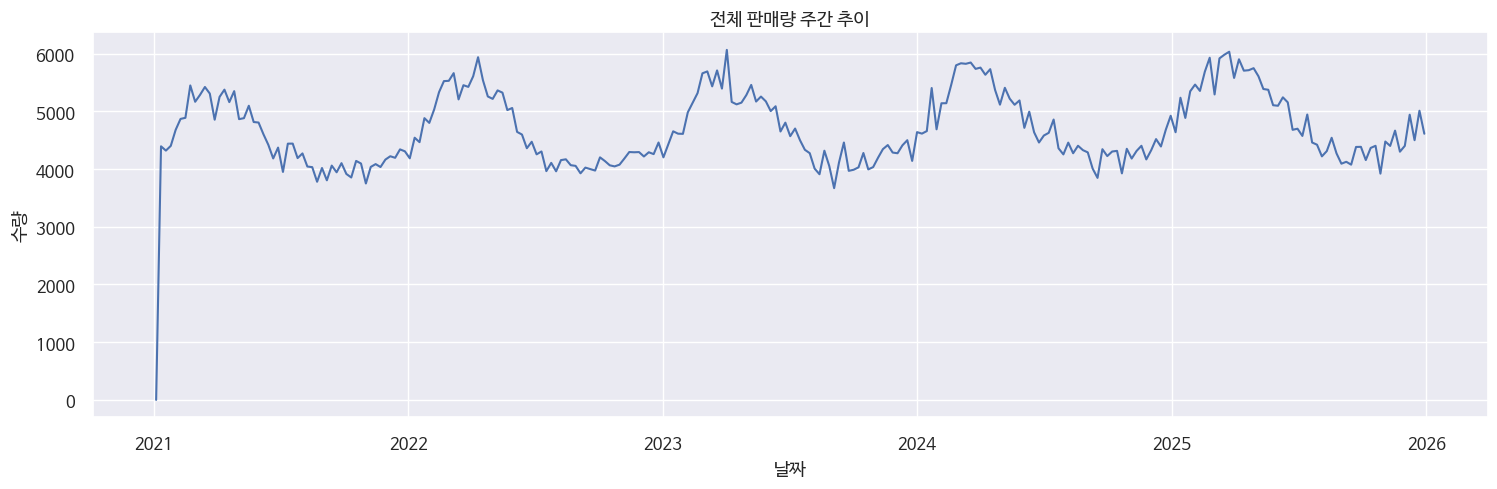

,target_date,actual_order_qty
0,2021-01-04,0
1,2021-01-11,4394
2,2021-01-18,4320
3,2021-01-25,4402
4,2021-02-01,4679


In [277]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

ts_total = (
    df_sales
    .groupby("target_date")["actual_order_qty"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(18,5))
plt.plot(ts_total["target_date"], ts_total["actual_order_qty"])
plt.title("전체 판매량 주간 추이")
plt.ylabel("수량")
plt.xlabel("날짜")
plt.grid(True)
plt.show()

ts_total.head()


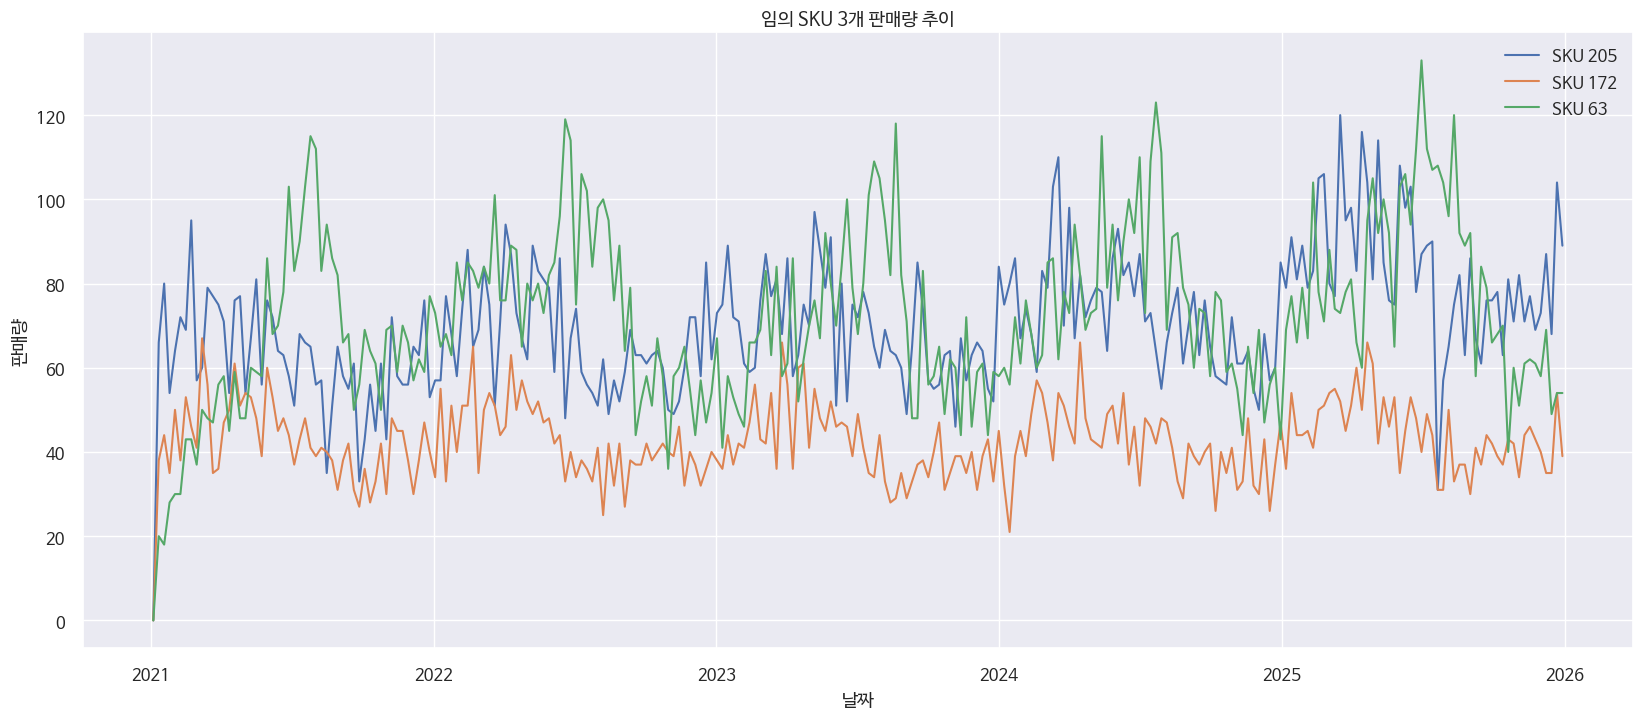

In [279]:
sample_skus = random.sample(df_sales["sku_id"].unique().tolist(), 3)
sample_skus


plt.figure(figsize=(20,8))

for sku in sample_skus:
    sub = df_sales[df_sales["sku_id"] == sku]
    plt.plot(sub["target_date"], sub["actual_order_qty"], label=f"SKU {sku}")

plt.title("임의 SKU 3개 판매량 추이")
plt.xlabel("날짜")
plt.ylabel("판매량")
plt.legend()
plt.grid(True)
plt.show()


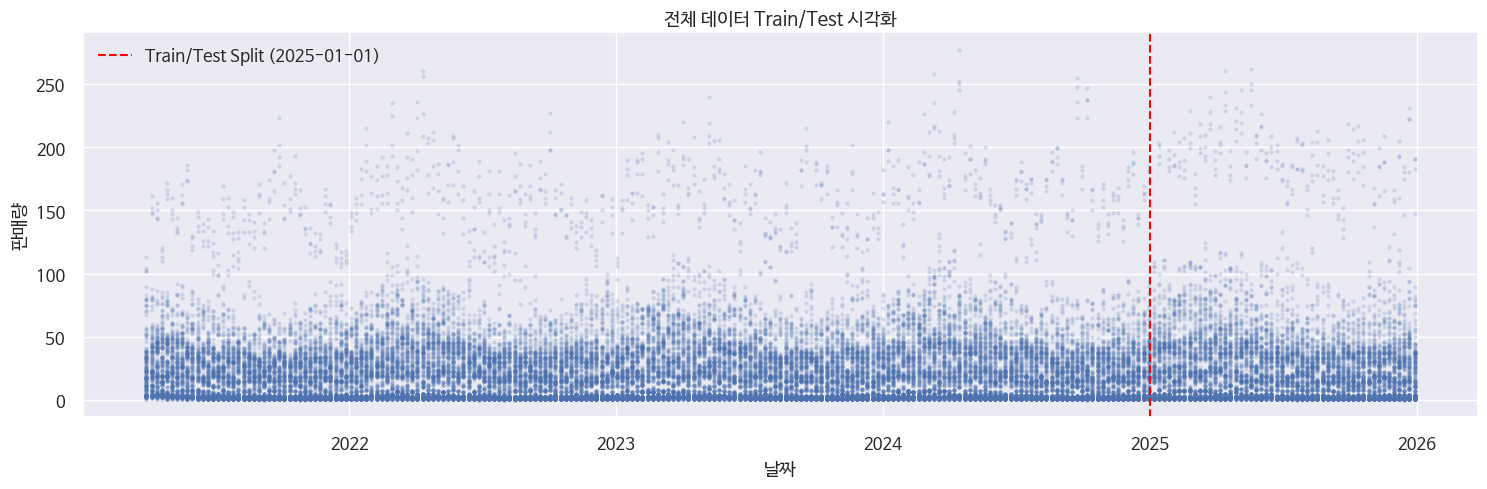

In [280]:
boundary = pd.Timestamp("2025-01-01")

plt.figure(figsize=(18,5))
plt.plot(df_feat["target_date"], df_feat["actual_order_qty"], ".", alpha=0.2)

plt.axvline(boundary, color="red", linestyle="--", label="Train/Test Split (2025-01-01)")

plt.title("전체 데이터 Train/Test 시각화")
plt.xlabel("날짜")
plt.ylabel("판매량")
plt.legend()
plt.show()


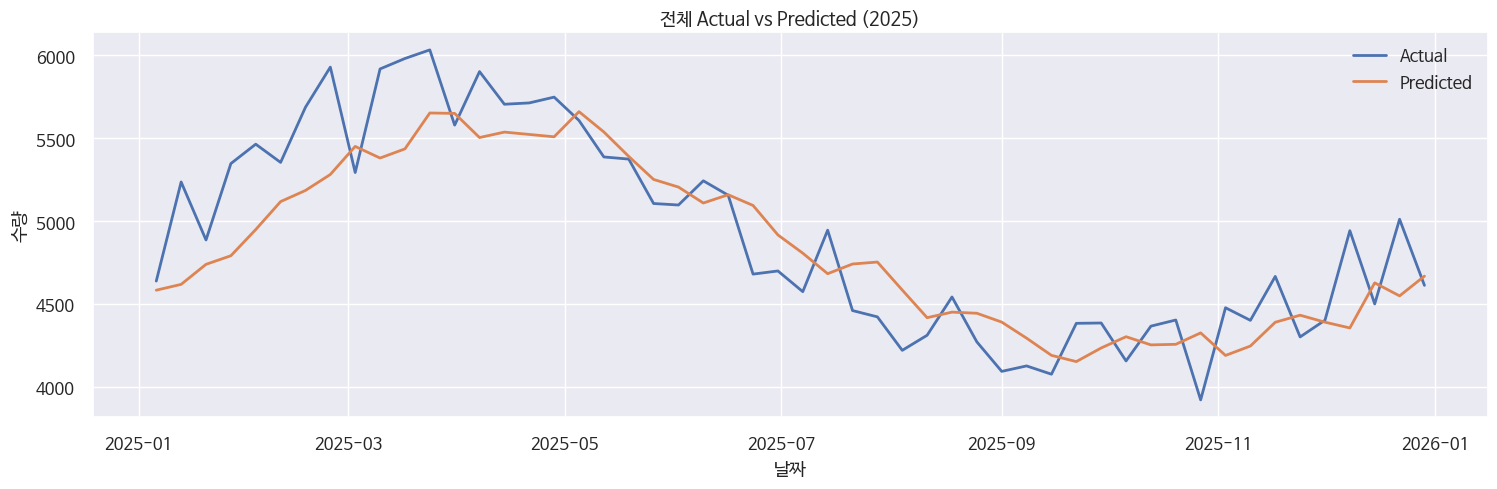

In [281]:
ts_pred = (
    df_pred.groupby("target_date")[["y", "y_pred"]]
    .sum()
    .reset_index()
)

plt.figure(figsize=(18,5))
plt.plot(ts_pred["target_date"], ts_pred["y"], label="Actual", linewidth=2)
plt.plot(ts_pred["target_date"], ts_pred["y_pred"], label="Predicted", linewidth=2)
plt.title("전체 Actual vs Predicted (2025)")
plt.xlabel("날짜")
plt.ylabel("수량")
plt.legend()
plt.grid(True)
plt.show()


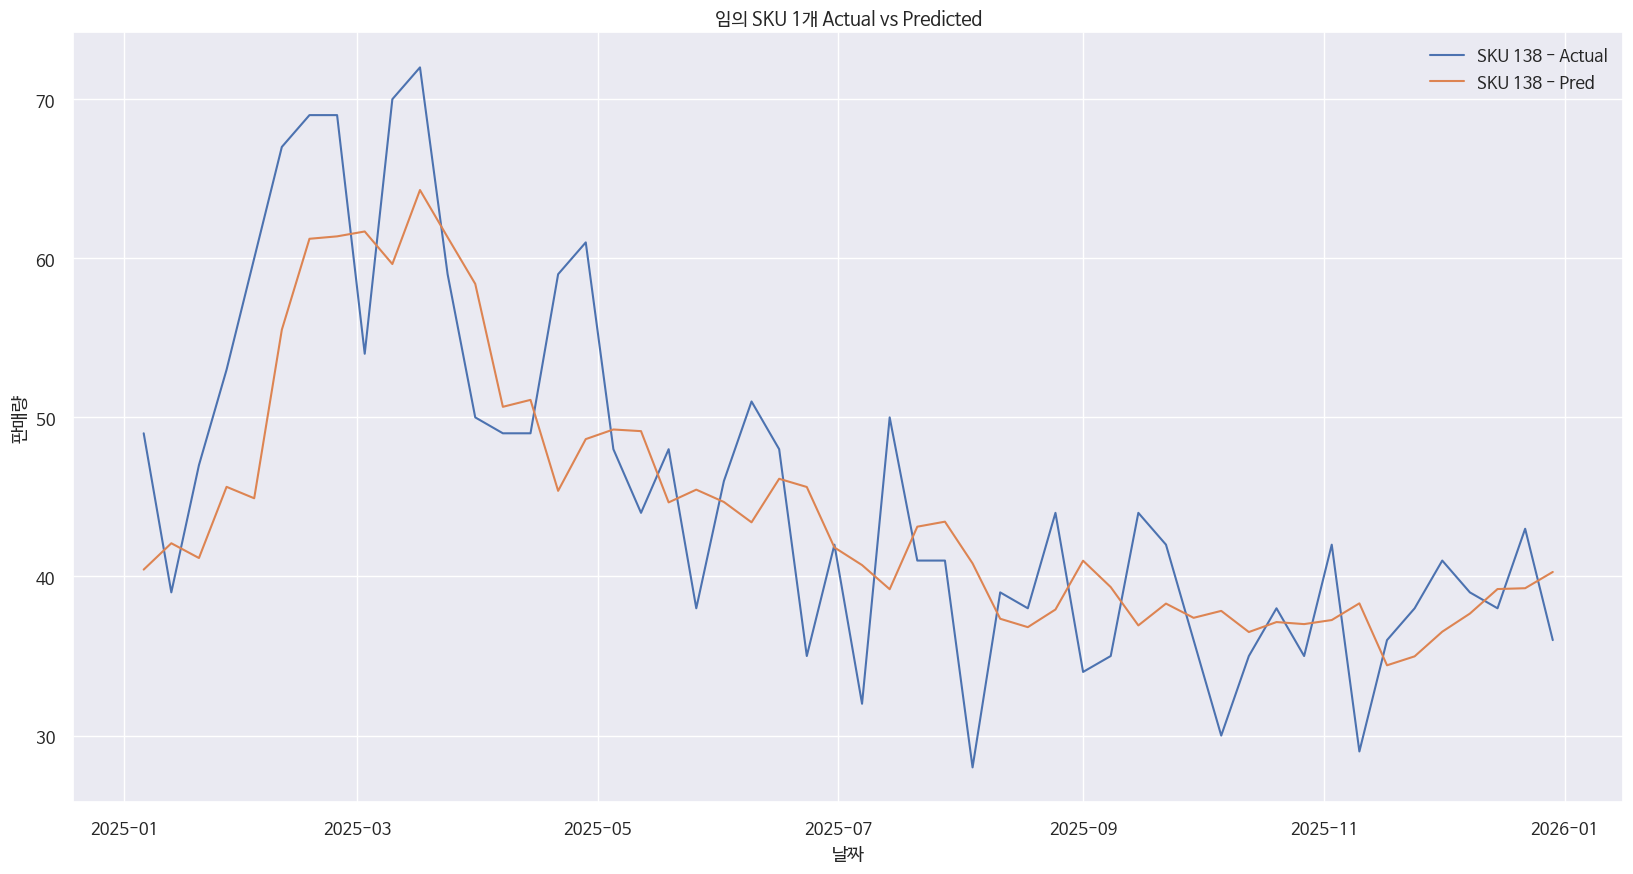

[138]

In [286]:
sample_skus_pred = random.sample(df_pred["sku_id"].unique().tolist(), 1)

plt.figure(figsize=(20,10))

for sku in sample_skus_pred:
    sub = df_pred[df_pred["sku_id"] == sku]
    plt.plot(sub["target_date"], sub["y"], label=f"SKU {sku} - Actual")
    plt.plot(sub["target_date"], sub["y_pred"], label=f"SKU {sku} - Pred")

plt.title("임의 SKU 1개 Actual vs Predicted")
plt.xlabel("날짜")
plt.ylabel("판매량")
plt.legend()
plt.grid(True)
plt.show()

sample_skus_pred


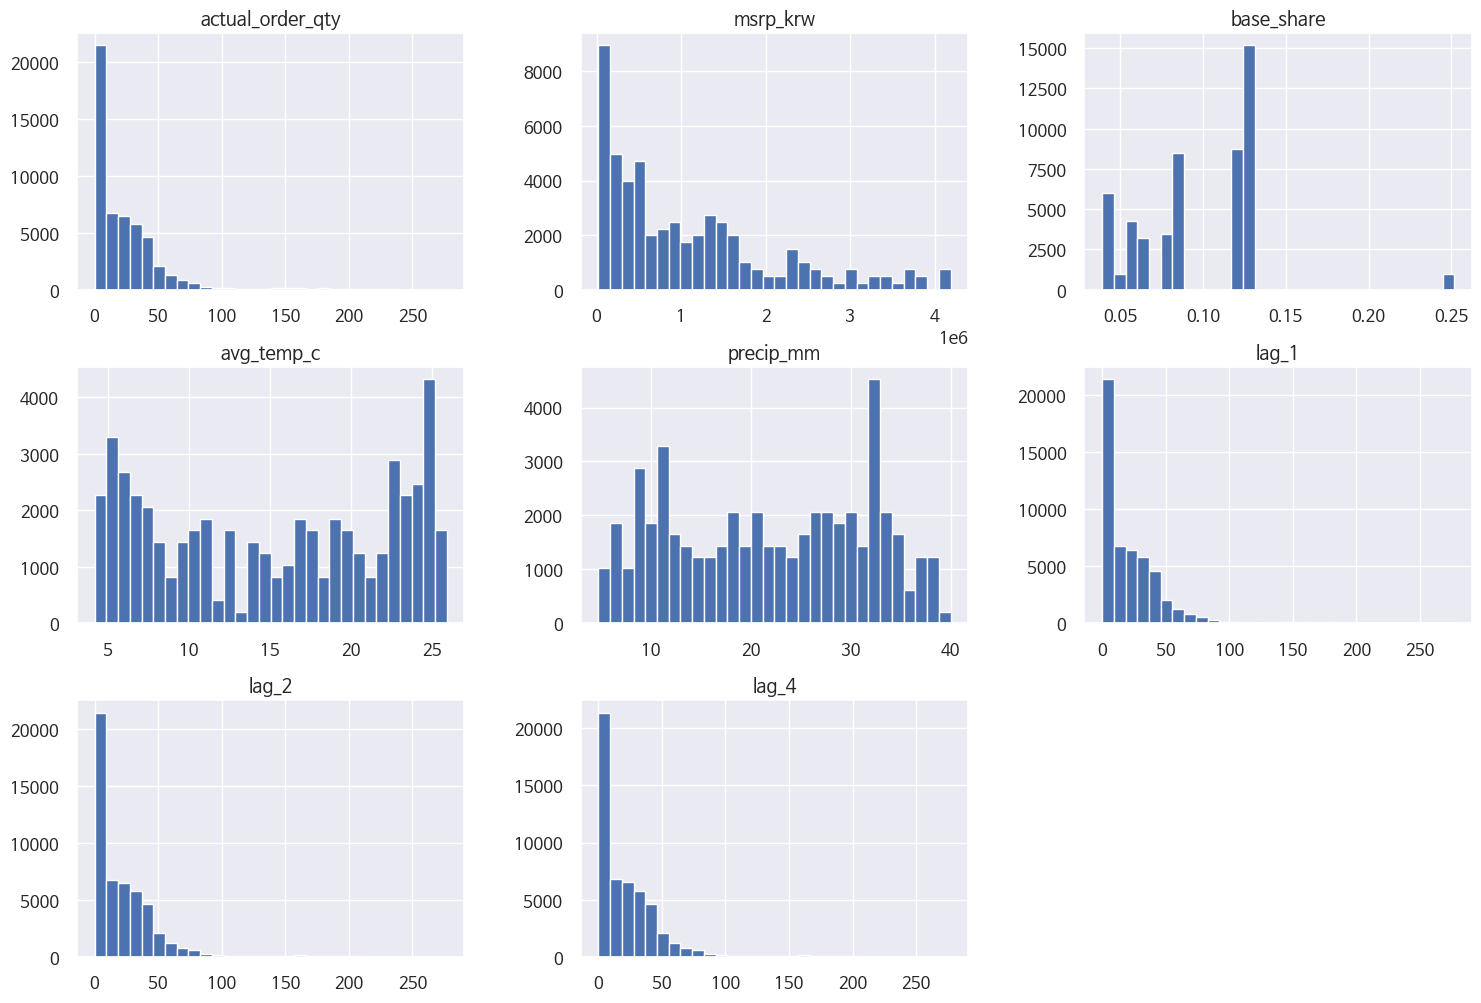

In [287]:
num_cols = ["actual_order_qty", "msrp_krw", "base_share",
            "avg_temp_c", "precip_mm", "lag_1", "lag_2", "lag_4"]

df_feat[num_cols].hist(figsize=(18,12), bins=30)
plt.show()


C:\Users\chosw\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
C:\Users\chosw\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


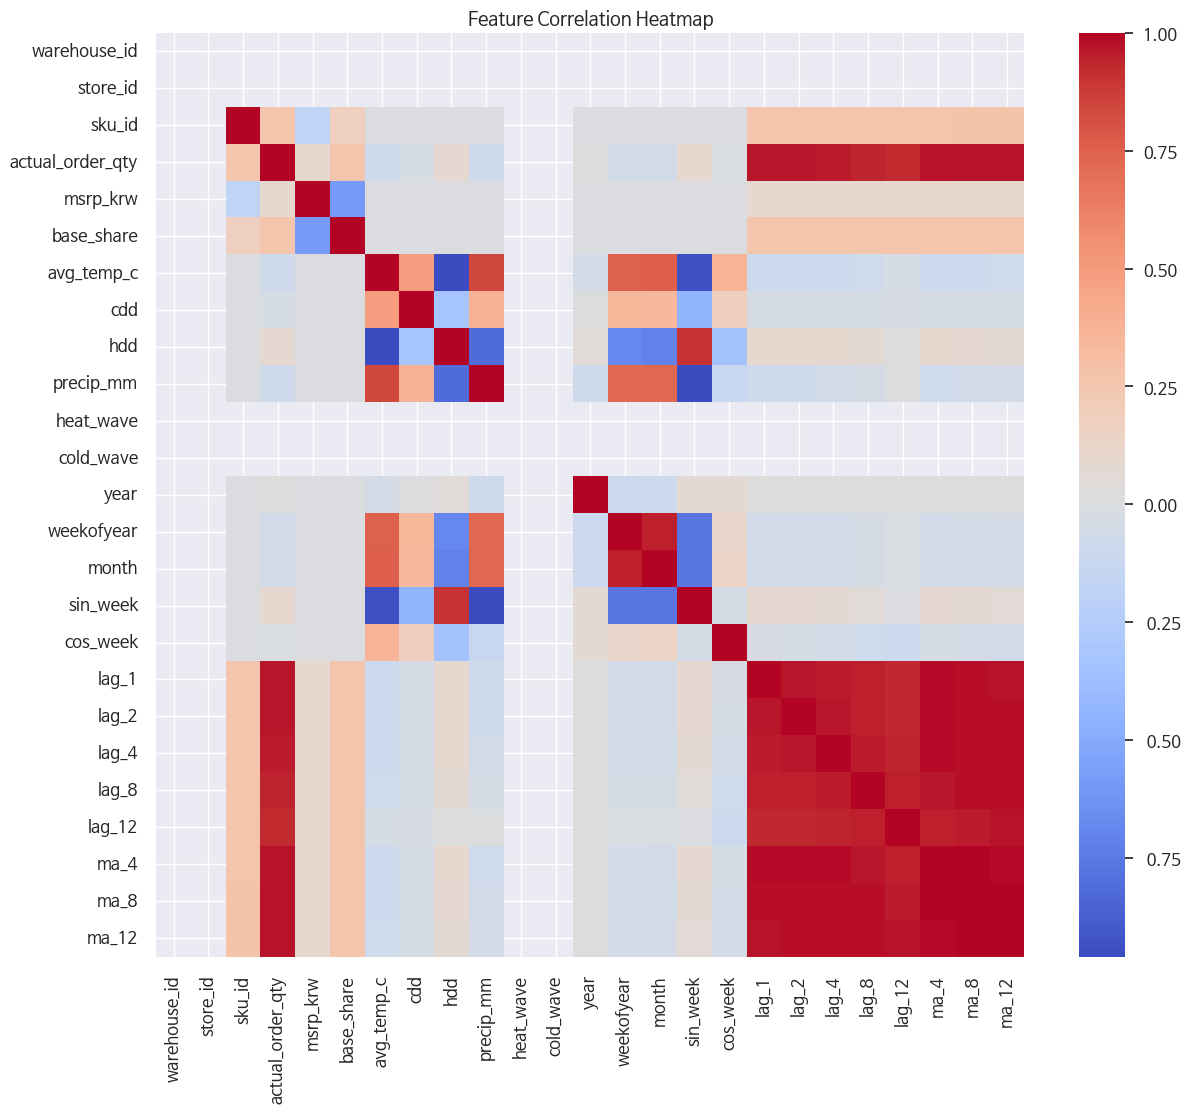

In [288]:
plt.figure(figsize=(14,12))
sns.heatmap(df_feat.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


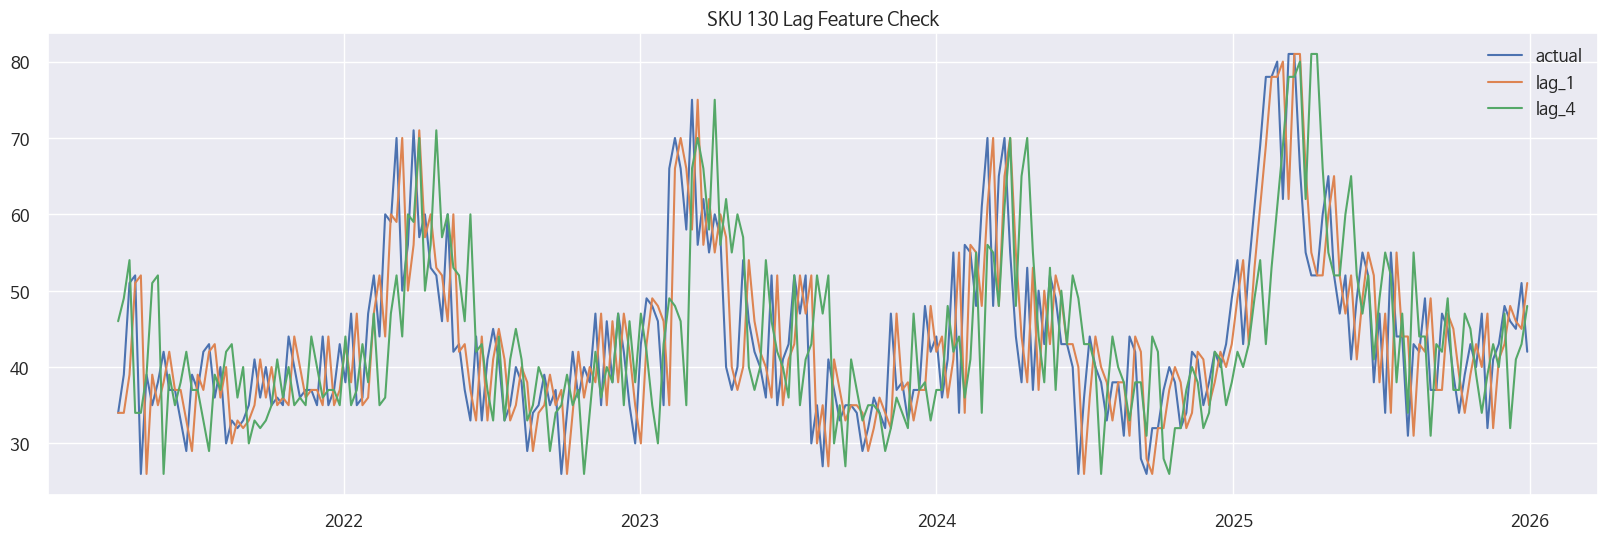

In [262]:
sku = random.choice(df_feat["sku_id"].unique().tolist())

sub = df_feat[df_feat["sku_id"] == sku].sort_values("target_date")

plt.figure(figsize=(20,6))
plt.plot(sub["target_date"], sub["actual_order_qty"], label="actual")
plt.plot(sub["target_date"], sub["lag_1"], label="lag_1")
plt.plot(sub["target_date"], sub["lag_4"], label="lag_4")
plt.legend()

plt.title(f"SKU {sku} Lag Feature Check")
plt.grid(True)
plt.show()


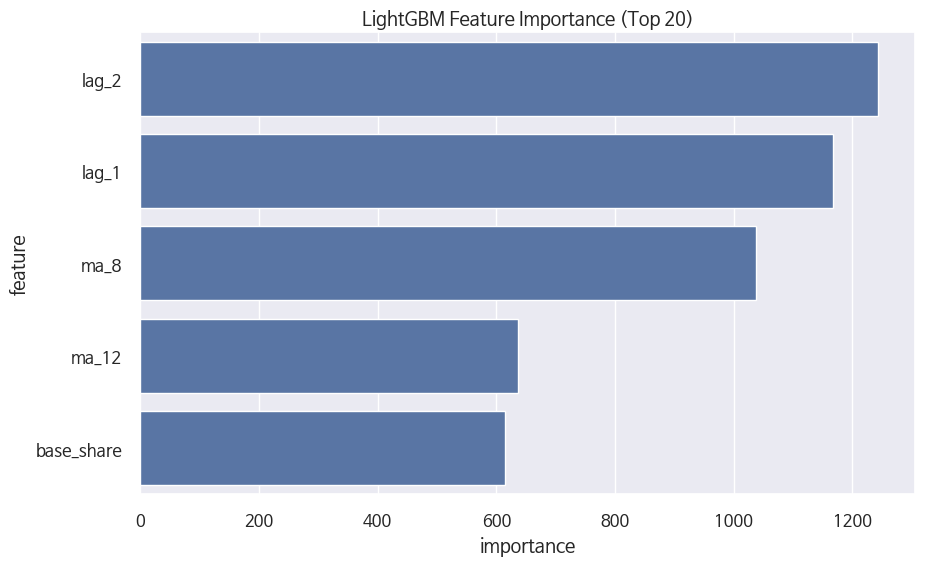

In [289]:
import joblib
MODEL_PATH = BASE / "lightgbm_model.pkl"
model = joblib.load(MODEL_PATH)

importances = model.feature_importance()
columns = model.feature_name()

feat_imp = pd.DataFrame({"feature": columns, "importance": importances})
feat_imp = feat_imp.sort_values("importance", ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x="importance", y="feature")
plt.title("LightGBM Feature Importance (Top 20)")
plt.show()


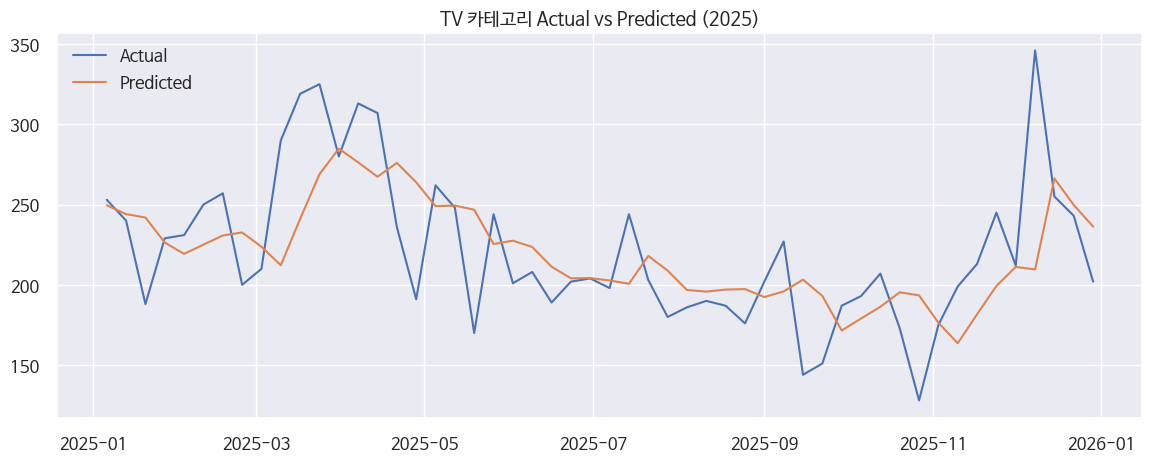

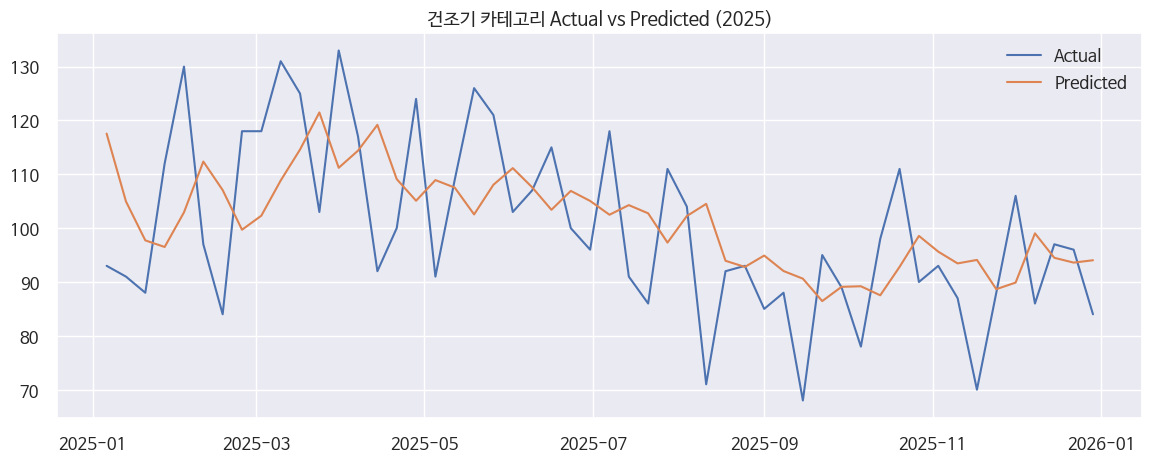

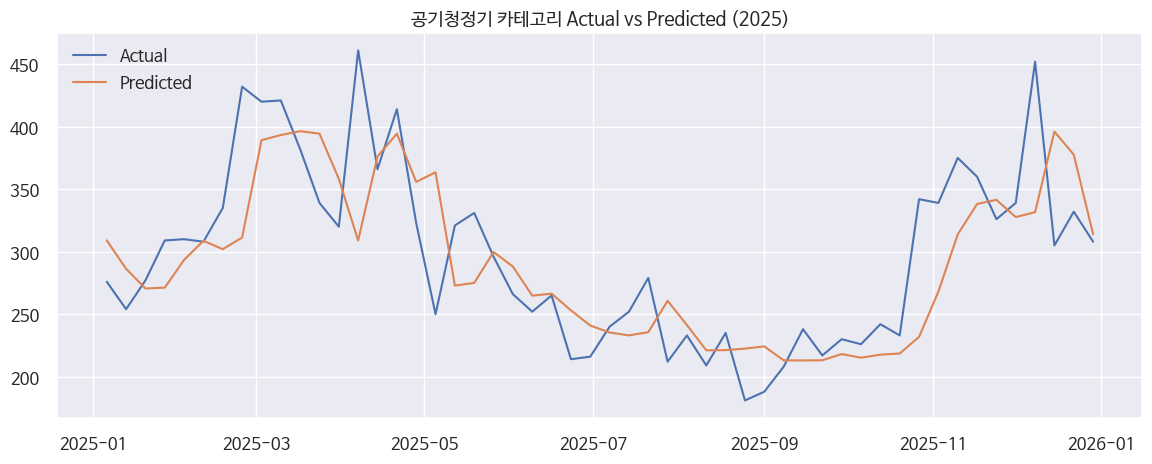

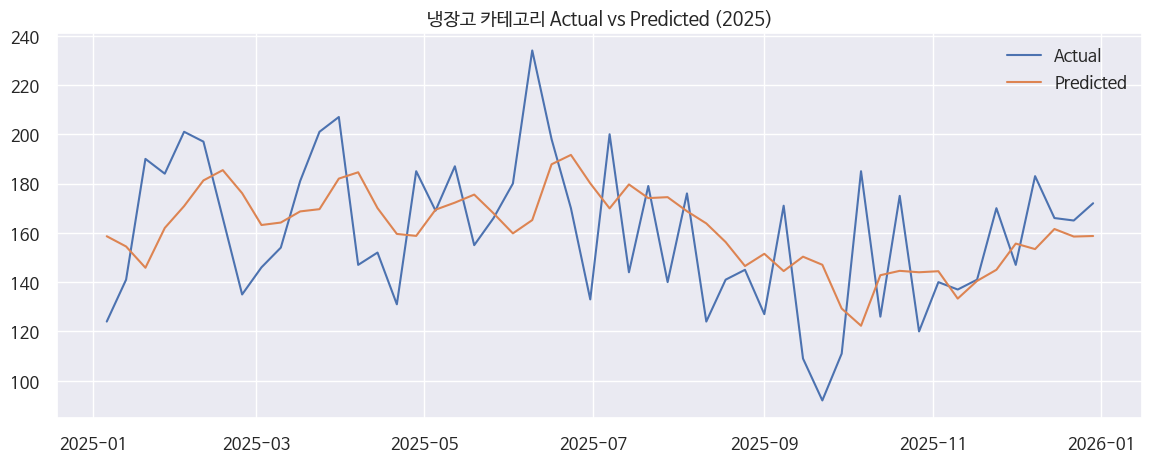

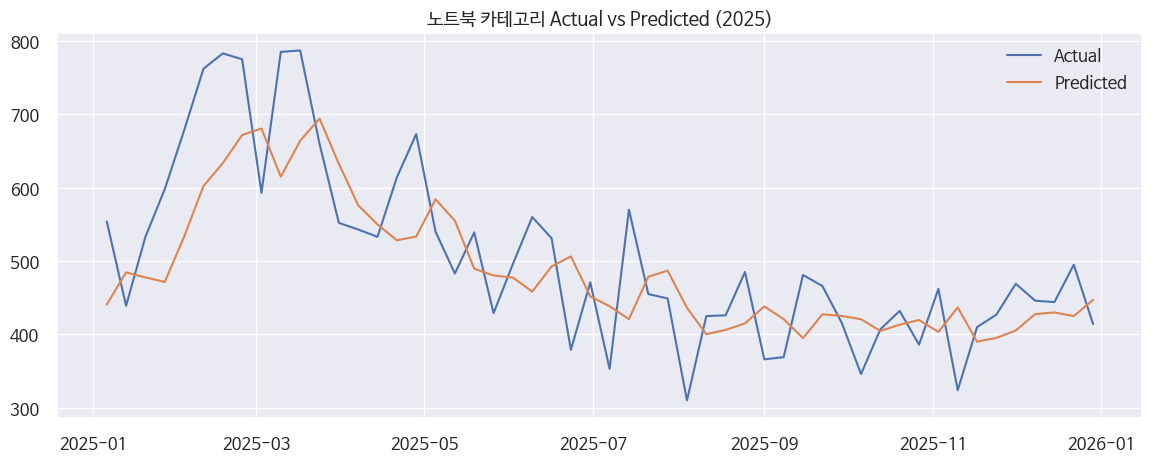

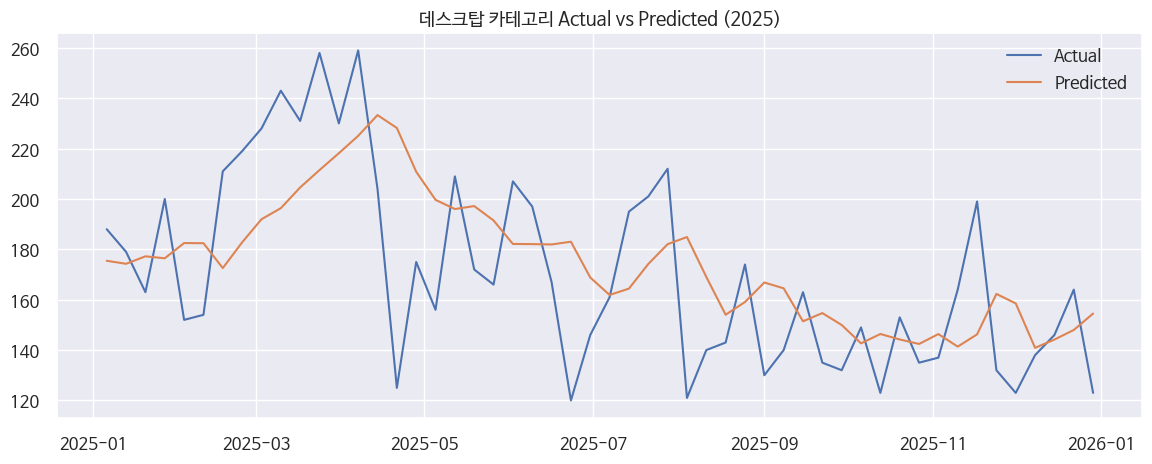

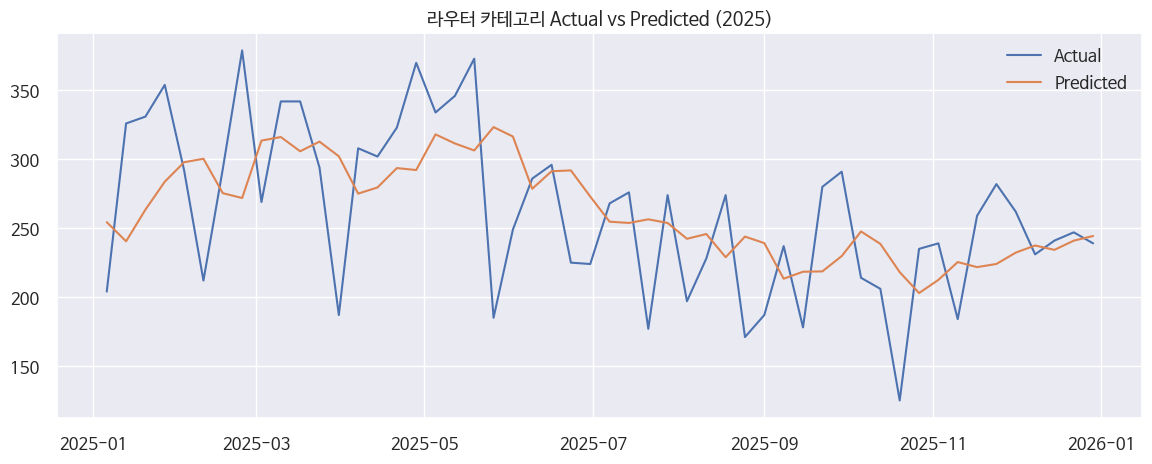

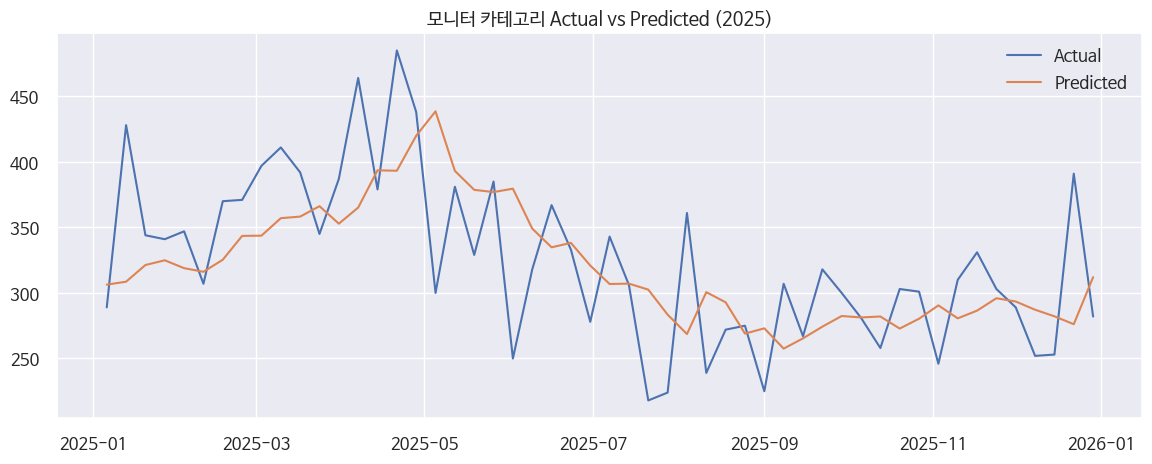

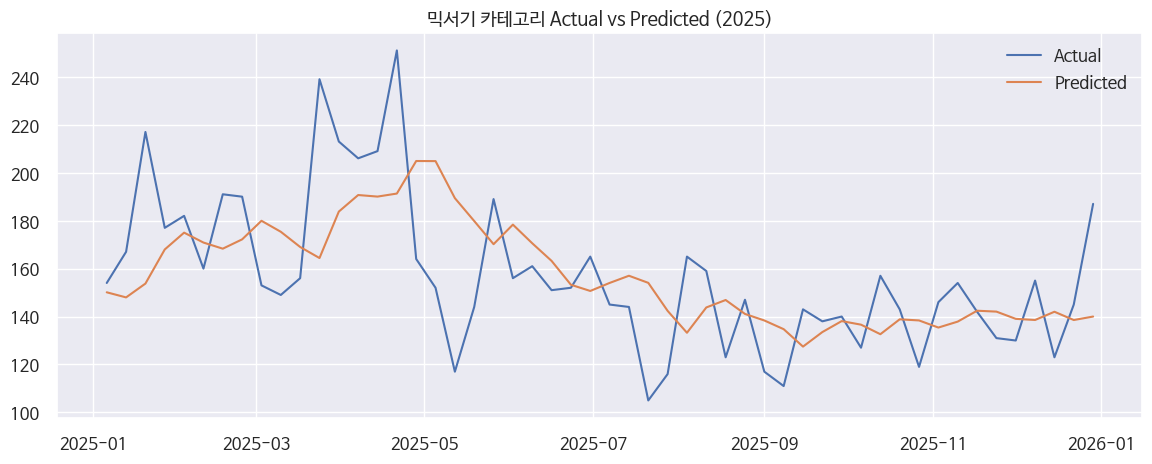

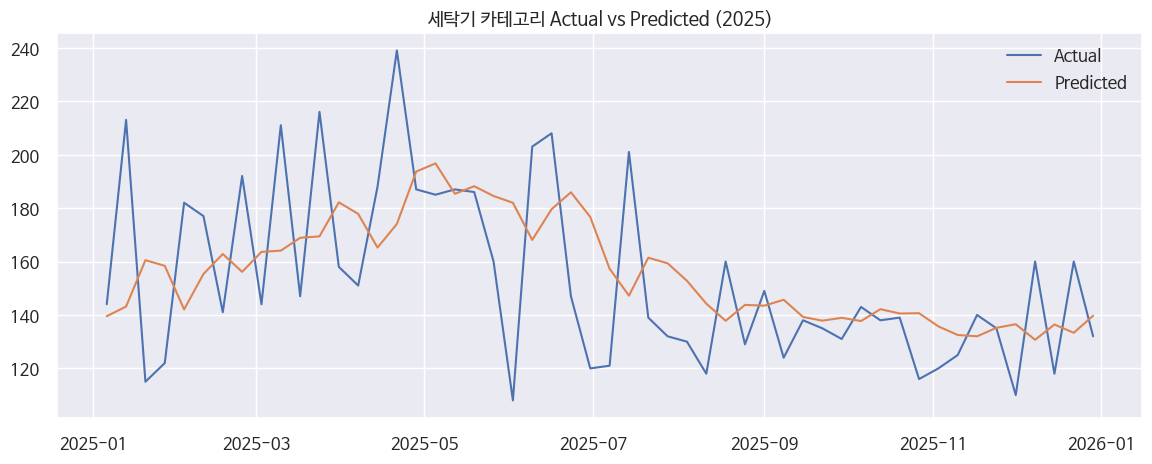

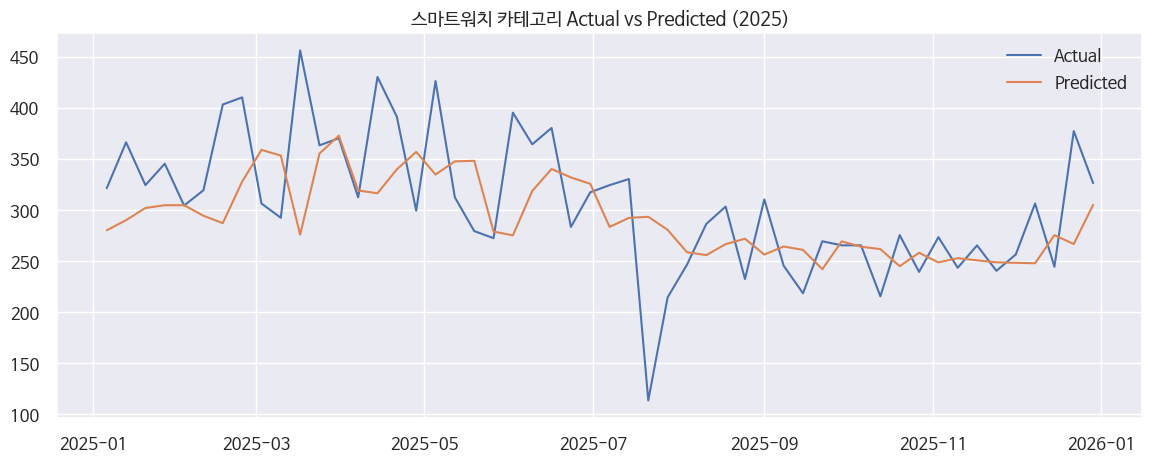

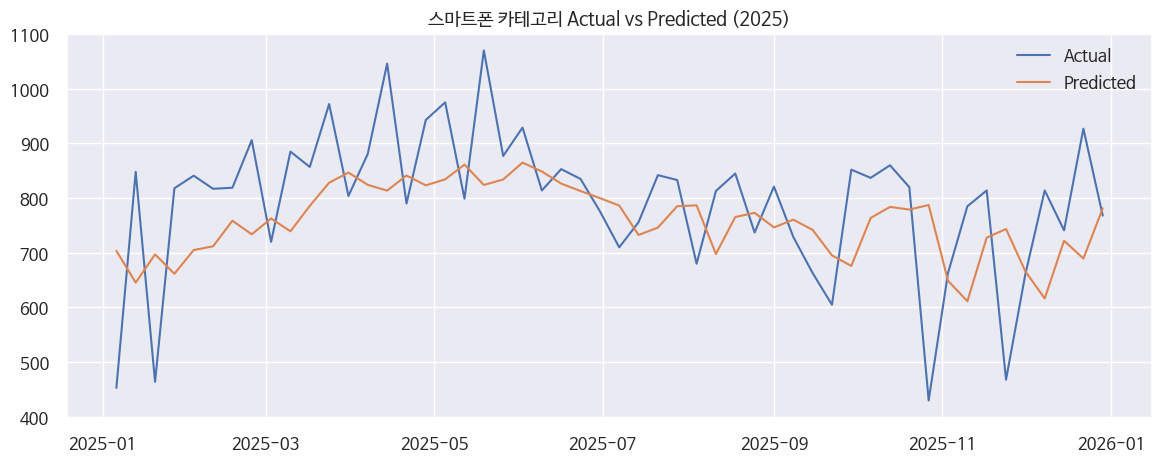

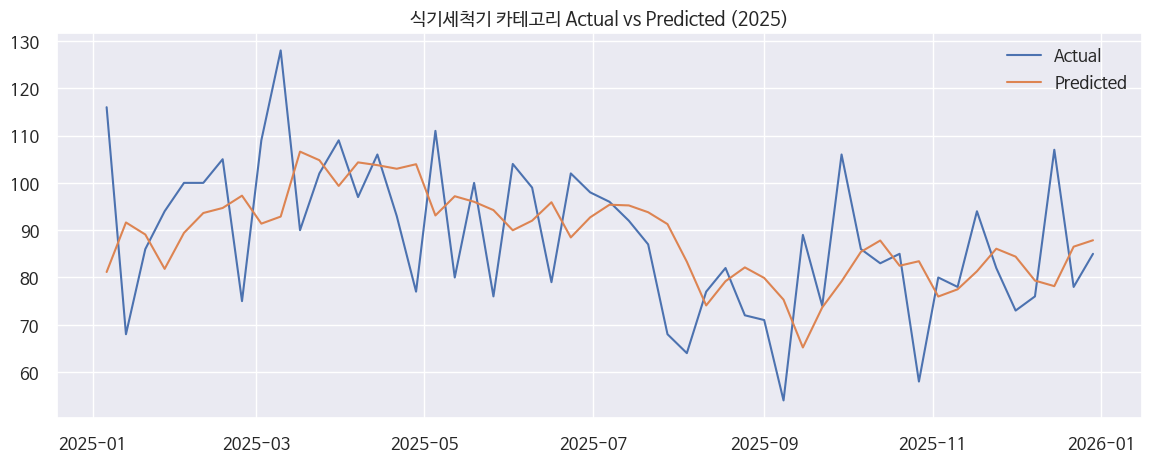

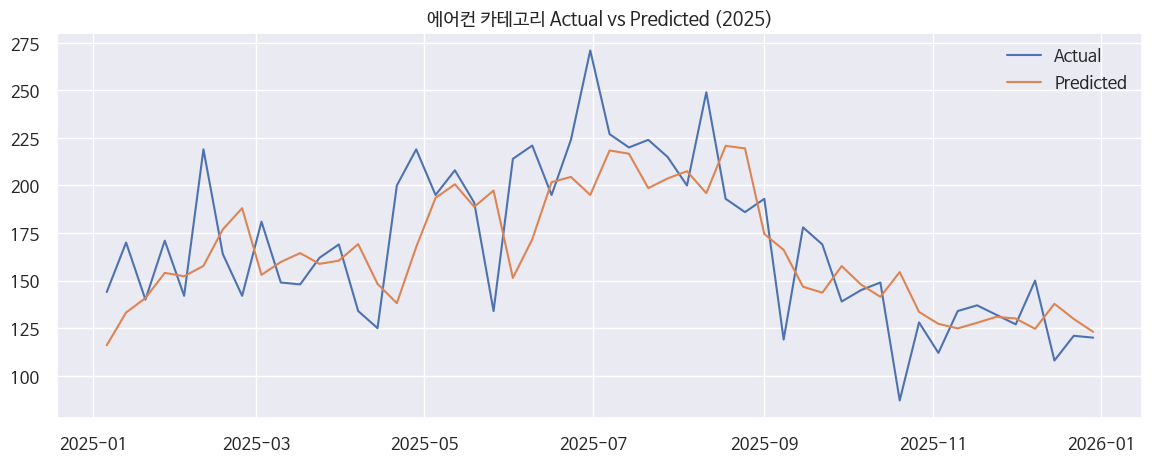

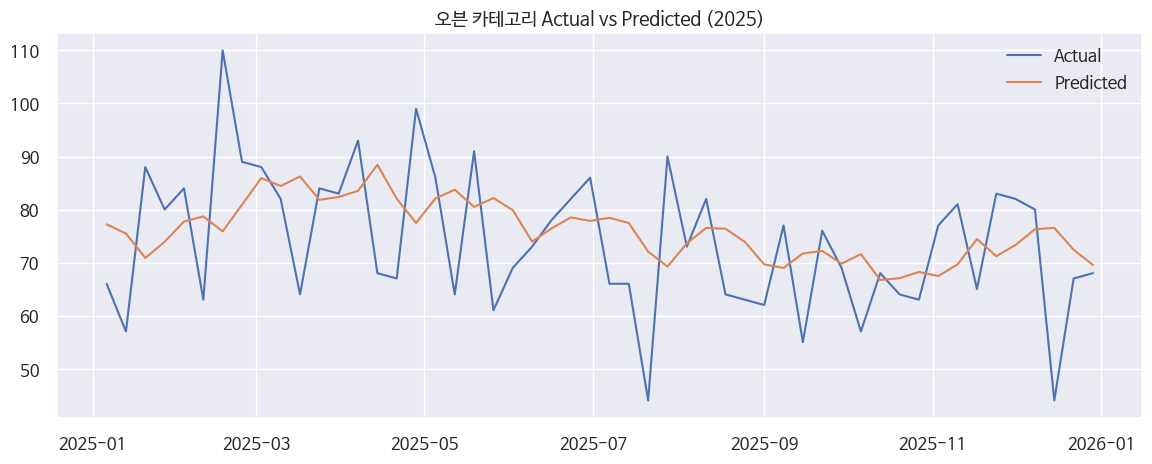

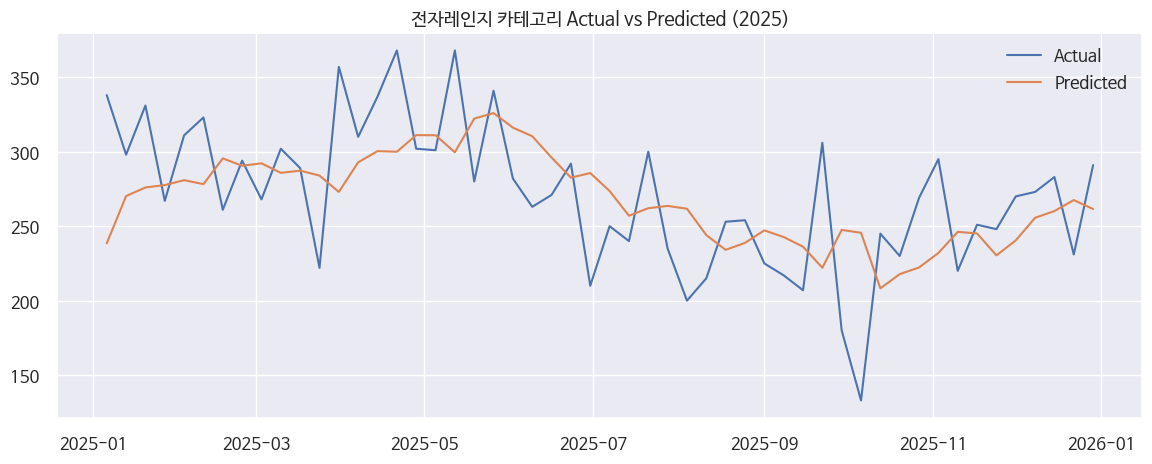

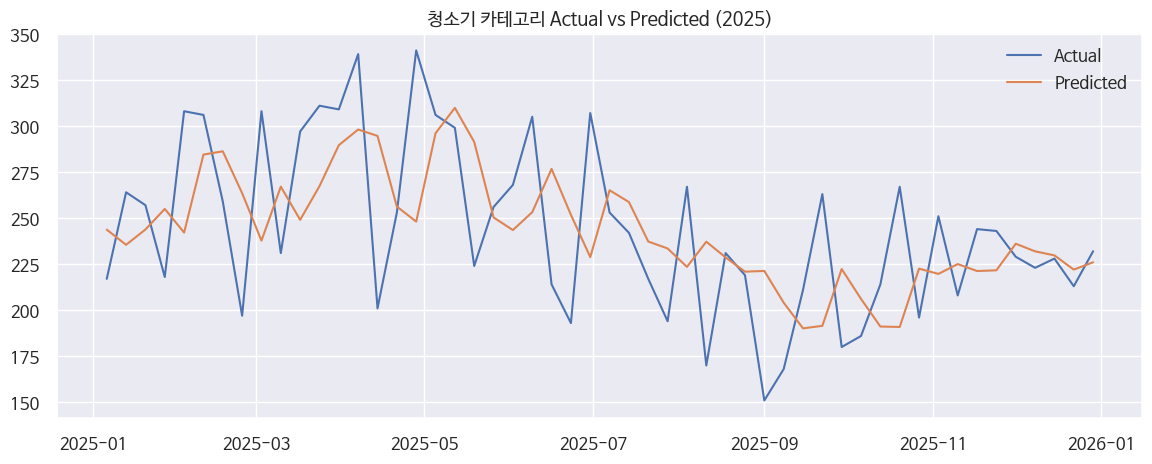

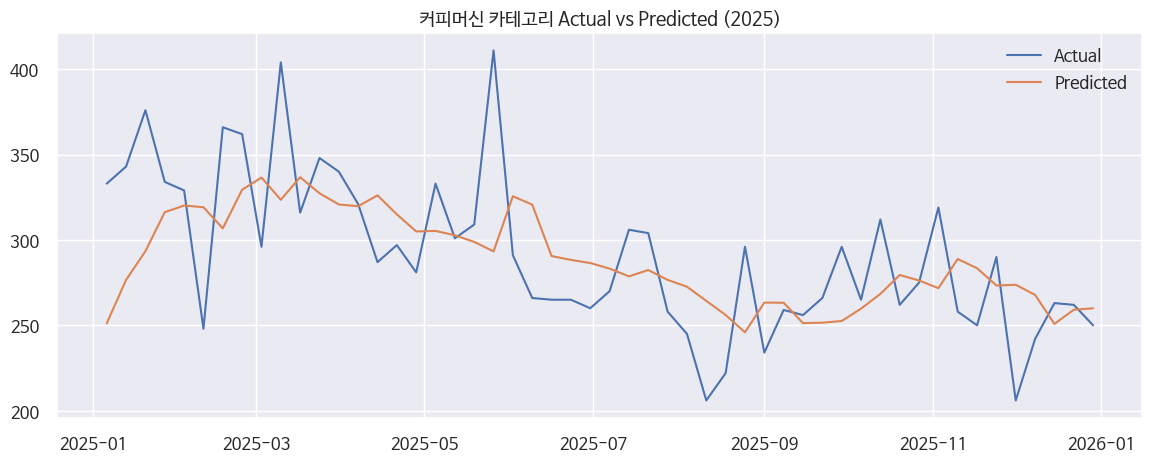

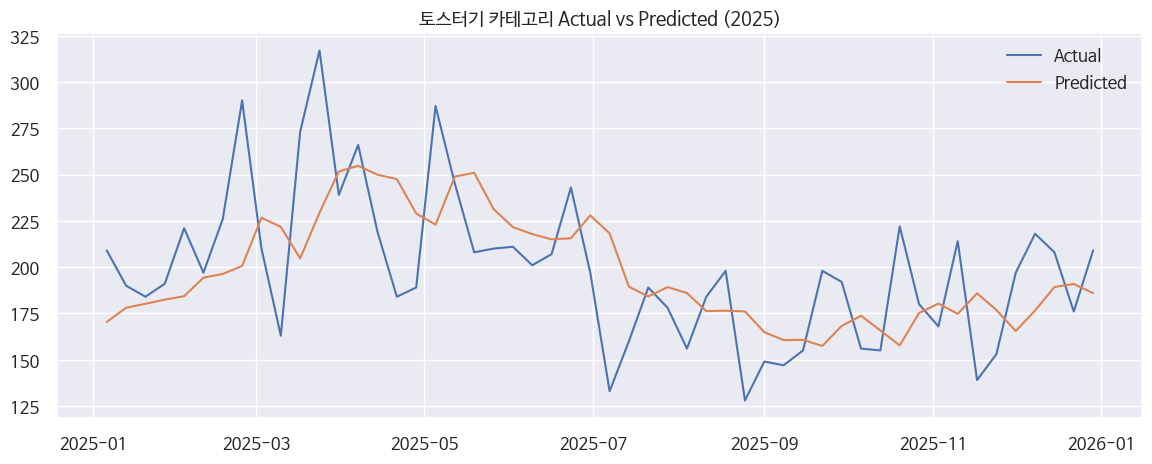

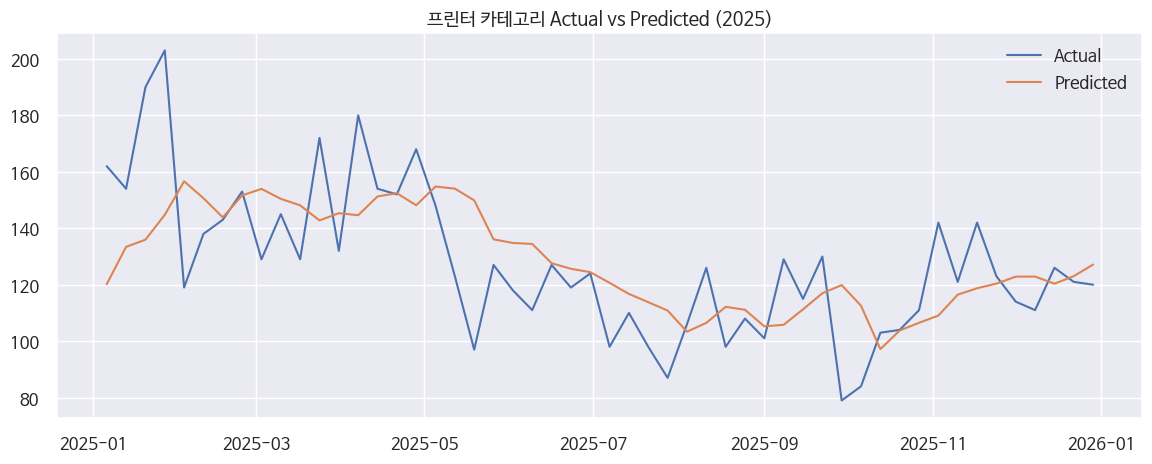

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE = Path.cwd().parents[1] / "python-server" / "app" / "data_pipeline"


EVAL_DF = BASE / "eval_2025_pred_vs_actual.csv"

eval_df = pd.read_csv(EVAL_DF, parse_dates=["target_date"])

SKU_IN = BASE / "sku_catalog_ml_with_share.csv"


sku_info = pd.read_csv(SKU_IN)

df = eval_df.merge(sku_info[["sku_id","cat_low"]], on="sku_id", how="left")

cat_group = df.groupby(["cat_low","target_date"]).agg(
    actual=("y","sum"),
    pred=("y_pred","sum")
).reset_index()

for cat in cat_group["cat_low"].unique():
    g = cat_group[cat_group["cat_low"] == cat]
    plt.figure(figsize=(14,5))
    plt.plot(g["target_date"], g["actual"], label="Actual")
    plt.plot(g["target_date"], g["pred"], label="Predicted")
    plt.title(f"{cat} 카테고리 Actual vs Predicted (2025)")
    plt.legend()
    plt.show()


In [297]:
import numpy as np
import pandas as pd

EVAL_DF = BASE / "eval_2025_pred_vs_actual.csv"

df = pd.read_csv(EVAL_DF, parse_dates=["target_date"])

SKU_IN = BASE / "sku_catalog_ml_with_share.csv"


sku = pd.read_csv(SKU_IN)
y = df["y"].values
y_pred = df["y_pred"].values

# MAE
mae = np.mean(np.abs(y - y_pred))

# RMSE
rmse = np.sqrt(np.mean((y - y_pred)**2))

# MAPE (y=0 제거)
mask = y != 0
mape = np.mean(np.abs((y[mask] - y_pred[mask]) / y[mask])) * 100

# SMAPE
smape = 100 * np.mean(
    np.abs(y - y_pred) / ((np.abs(y) + np.abs(y_pred)) / 2 + 1e-9)
)

print("MAE   :", mae)
print("RMSE  :", rmse)
print("MAPE% :", mape)
print("SMAPE%:", smape)


MAE   : 3.3672377437920114
RMSE  : 6.7826952170003665
MAPE% : 19.09769191260145
SMAPE%: 17.671216580369048


MAE = 3.36   
평균적으로 예측값이 실제값에서 3.36개 정도 차이난다는 의미.   
-> SKU별 주간 수요 수준이 평균 50~200개임을 고려하면 꽤 안정적인 수준   
<br>
<br>
<br>
RMSE = 6.78   
정확도 측정 시 RMSE는 MAE보다 오차에 민감한데,   
RMSE ≈ 2 × MAE  
는 전형적으로 잔차가 적절히 분포되어 있을 때 나오는 모습.  
-> 잔차 분포도 정상  
<br>
<br>
<br>
MAPE = 19.09%  
전 세계 리테일/상품 주문 수요예측 기준으로 일반적으로    
| 예측 품질         | MAPE 기준 |
| ------------- | ------- |
| 최상급       | 10% 이하  |
| 좋음        | 10–20%  |
| 적정/현실적 수준| 20–30%  |
| 개선 필요     | 30% 이상  |

MAPE = 19%  
실제 기업(마트, 전자제품 리테일)에서 SKU level 주간 예측 정확도는 대부분 15–40% 사이임.  
그중에서도 상위권 정확도.  
<br>
<br>
<br>
SMAPE = 17.67%  
SMAPE는 실제값=0 이슈에 덜 취약한 버전인데  
17.6%는 매우 안정적인 결과.  
SMAPE가 20% 아래면 전체적으로 매우 양호.  

In [298]:
# SKU별 MAE / MAPE
sku_metrics = df.groupby("sku_id").apply(
    lambda g: pd.Series({
        "mae": np.mean(np.abs(g["y"] - g["y_pred"])),
        "mape": np.mean(np.abs((g["y"] - g["y_pred"]) / (g["y"] + 1e-9))) * 100,
        "mean_y": g["y"].mean(),
    })
).reset_index()

# 판매량 상위 20개 SKU만 보기
top_sku = sku_metrics.sort_values("mean_y", ascending=False).head(20)
top_sku


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_33600\1347554894.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sku_metrics = df.groupby("sku_id").apply(


,sku_id,mae,mape,mean_y
199,200,28.246797,15.481795,196.653846
191,192,24.933881,14.572140,187.269231
196,197,24.876990,15.084201,180.326923
201,202,21.040368,14.313210,169.788462
204,205,12.496968,15.906551,83.115385
62,63,11.383996,14.405483,80.615385
202,203,12.699531,16.727348,80.288462
69,70,11.621905,15.161090,79.153846
72,73,9.591192,12.032280,75.980769
73,74,9.192612,12.090685,72.788462


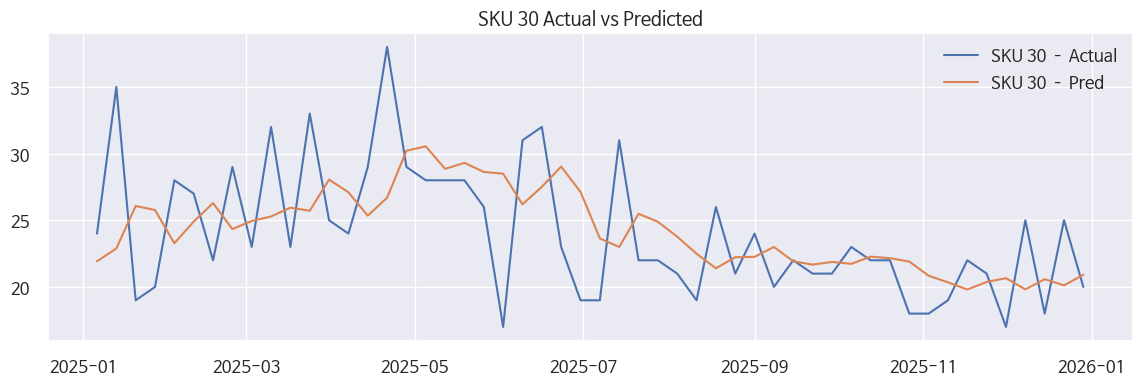

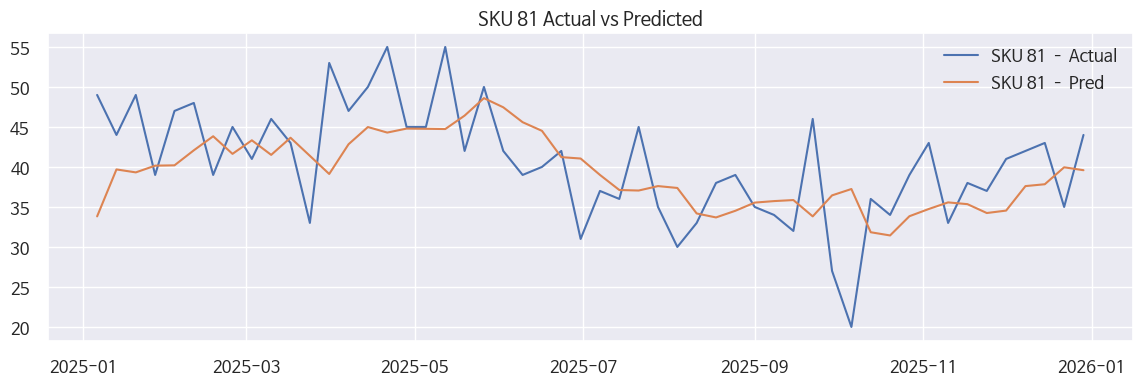

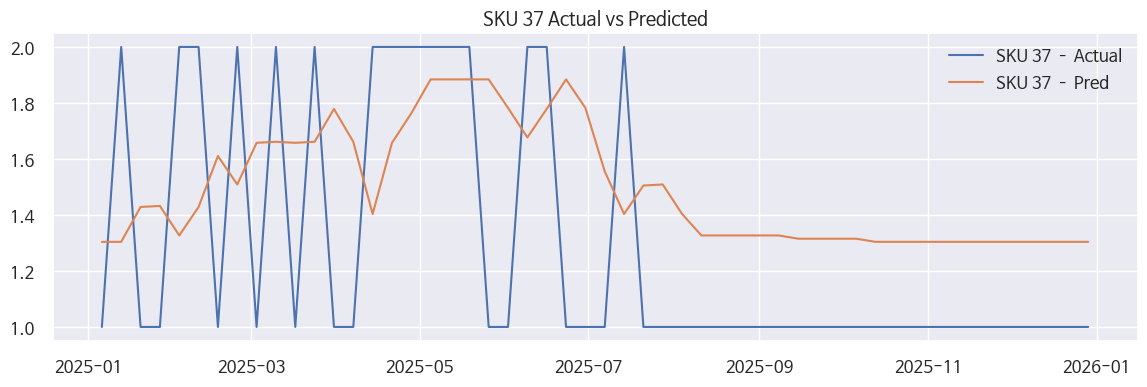

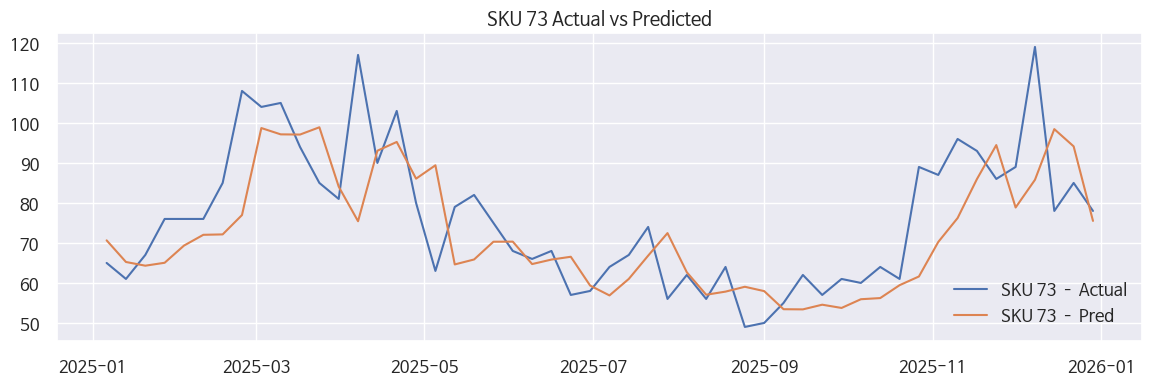

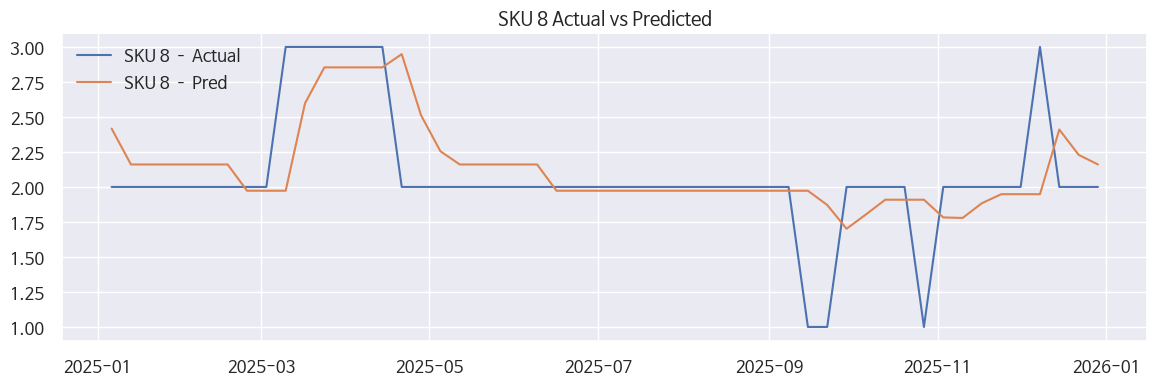

In [265]:
import random

random_skus = random.sample(list(df["sku_id"].unique()), 5)

for sid in random_skus:
    subset = df[df["sku_id"] == sid].sort_values("target_date")

    plt.figure(figsize=(14, 4))
    plt.plot(subset["target_date"], subset["y"], label=f"SKU {sid} – Actual")
    plt.plot(subset["target_date"], subset["y_pred"], label=f"SKU {sid} – Pred")
    plt.legend()
    plt.title(f"SKU {sid} Actual vs Predicted")
    plt.show()


In [293]:
import numpy as np
import pandas as pd

def mae(y, y_pred):
    return np.mean(np.abs(y - y_pred))

def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mape(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    mask = y != 0
    return np.mean(np.abs((y[mask] - y_pred[mask]) / y[mask])) * 100

def smape(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(2 * np.abs(y_pred - y) / (np.abs(y) + np.abs(y_pred) + 1e-9)) * 100


In [294]:
BASE = Path.cwd().parents[1] / "python-server" / "app" / "data_pipeline"


EVAL_DF = BASE / "eval_2025_pred_vs_actual.csv"

df_eval = pd.read_csv(EVAL_DF, parse_dates=["target_date"])



y = df_eval["y"]
y_pred = df_eval["y_pred"]

print("전체 Forecast Metrics (2025) ")
print(f"MAE   : {mae(y, y_pred):.3f}")
print(f"RMSE  : {rmse(y, y_pred):.3f}")
print(f"MAPE  : {mape(y, y_pred):.3f} %")
print(f"SMAPE : {smape(y, y_pred):.3f} %")


전체 Forecast Metrics (2025) 
MAE   : 3.367
RMSE  : 6.783
MAPE  : 19.098 %
SMAPE : 17.671 %


In [295]:

BASE = Path.cwd().parents[1] / "python-server" / "app" / "data_pipeline"




EVAL_DF = BASE / "eval_2025_pred_vs_actual.csv"
df_eval = pd.read_csv(EVAL_DF)

FEAT = BASE / "features_all.csv"
df_feat = pd.read_csv(FEAT, parse_dates=["target_date"])




df_eval["target_date"] = pd.to_datetime(df_eval["target_date"])
df_feat["target_date"] = pd.to_datetime(df_feat["target_date"])


df = df_eval.merge(
    df_feat[["target_date", "sku_id", "cat_low"]],
    on=["target_date", "sku_id"],
    how="left"
)


def mae(y, y_pred): return np.mean(np.abs(y - y_pred))
def rmse(y, y_pred): return np.sqrt(np.mean((y - y_pred)**2))
def mape(y, y_pred): 
    mask = y != 0
    return np.mean(np.abs((y[mask]-y_pred[mask]) / y[mask])) * 100
def smape(y, y_pred):
    return np.mean(2*np.abs(y_pred-y) / (np.abs(y)+np.abs(y_pred)+1e-9)) * 100


category_metrics = []

for cat, g in df.groupby("cat_low"):
    category_metrics.append([
        cat,
        mae(g["y"], g["y_pred"]),
        rmse(g["y"], g["y_pred"]),
        mape(g["y"], g["y_pred"]),
        smape(g["y"], g["y_pred"])
    ])

metrics_df = pd.DataFrame(category_metrics,
                          columns=["Category","MAE","RMSE","MAPE","SMAPE"])
metrics_df

,Category,MAE,RMSE,MAPE,SMAPE
0,TV,2.503472,4.905092,13.695856,12.568972
1,건조기,1.304159,3.121152,27.678642,24.311846
2,공기청정기,4.661924,8.763566,13.385241,13.025579
3,냉장고,1.993012,3.645426,29.709149,25.842291
4,노트북,2.893746,5.145907,14.273035,14.052613
5,데스크탑,1.688695,2.409848,22.288300,19.398943
6,라우터,5.574888,6.814350,18.889443,17.523014
7,모니터,5.096609,6.696902,12.868003,12.614230
8,믹서기,2.741663,3.566210,14.069751,13.637785
9,세탁기,1.453375,2.593016,29.843582,26.002027


In [296]:
sku_metrics = []

for sku, g in df.groupby("sku_id"):
    if len(g) < 5: 
        continue
    m = mae(g["y"], g["y_pred"])
    r = rmse(g["y"], g["y_pred"])
    mp = mape(g["y"], g["y_pred"])
    sm = smape(g["y"], g["y_pred"])
    sku_metrics.append([sku, m, r, mp, sm])

pd.DataFrame(sku_metrics, columns=["SKU", "MAE", "RMSE", "MAPE", "SMAPE"])


,SKU,MAE,RMSE,MAPE,SMAPE
0,1,5.294114,7.015370,13.475593,13.082851
1,2,0.235711,0.370555,13.450270,11.756456
2,3,0.235711,0.370555,13.450270,11.756456
3,4,5.599463,7.357390,14.203478,13.871635
4,5,0.235711,0.370555,13.450270,11.756456
...,...,...,...,...,...
201,202,21.040368,26.713445,14.313210,13.263991
202,203,12.699531,16.957978,16.727348,16.073000
203,204,10.609592,13.695749,16.078693,15.145727
204,205,12.496968,16.932375,15.906551,15.502117
